# Performance comparison

Here, we visualize the performance of three runtimes: PyTorch, our custom-built tinyRuntime (both non-quantized and quantized versions), using the ResNet18 model and 100 images from the Imagenette dataset. We focus on four key metrics: accuracy, execution time, model size and memory usage.

## x86

,Accuracy (%),Time (s),Max memory usage (MB),Model size (MB)
PyTorch,99.0,11.445230,468.906250,44.938353
tinyRuntime (no quant),99.0,10.546698,65.218750,44.660263
tinyRuntime (quant),99.0,71.750532,33.976562,11.949406


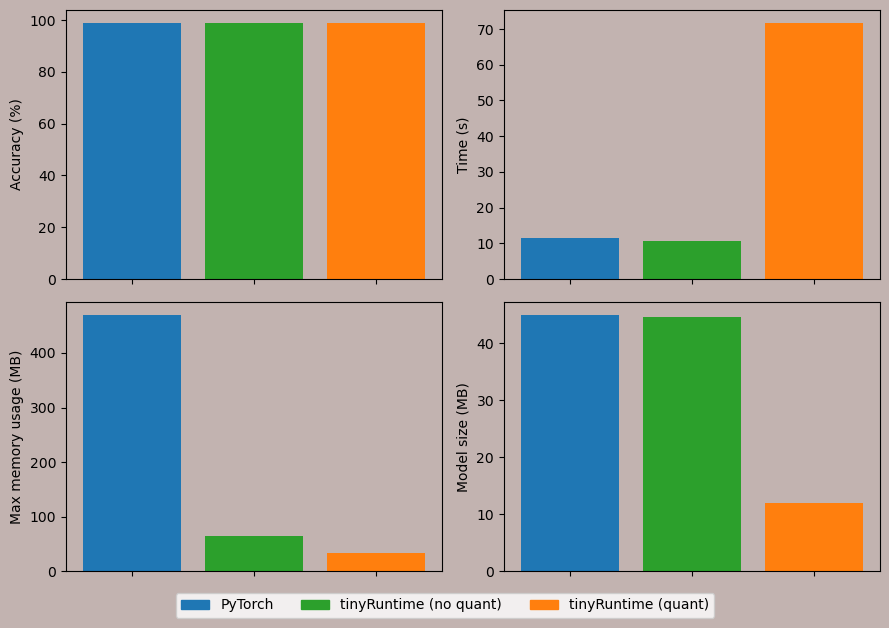

In [29]:
#| label: fig-x86
#| fig-cap: "Performance comparison on x86"

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

def split_dataframe(df):
    '''Split dataframe based on Runtime (Pytorch, tinyRuntime (no quant) and tinyRuntime (quant).'''
    df_pytorch = df[df["Runtime"] == "PyTorch"]
    df_trv = df[(df["Runtime"] == "tinyRuntime") & (df["Quantization"] == False)]
    df_trq = df[(df["Runtime"] == "tinyRuntime") & (df["Quantization"] == True)]
    return df_pytorch, df_trv, df_trq

def plot_runtime_result(ax, column, df_pytorch, df_trv, df_trq, ylabel):
    '''Plot the latest performance comparison based on the selected column.'''
    x = ["PyTorch", "tinyRuntime (no quant)", "tinyRuntime (quant)"]
    y = [df[column].values[-1] for df in [df_pytorch, df_trv, df_trq]]
    bar_colors = ['tab:blue', 'tab:green', 'tab:orange']
    bars = ax.bar(x, y, color=bar_colors)
    ax.set_ylabel(ylabel)
    ax.set_xticklabels([])
    ax.set_facecolor("#C2B3B0")

    return y  # Return the values for the column to construct the DataFrame

def plot_perf_comp(df):
    '''Plot latest performance comparisons.'''
    df_pytorch, df_trv, df_trq = split_dataframe(df)
    
    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(9, 6), sharex=True)
    
    # Plot and collect data for each metric
    accuracy_values = plot_runtime_result(axs[0, 0], "Accuracy", df_pytorch, df_trv, df_trq, "Accuracy (%)")
    time_values = plot_runtime_result(axs[0, 1], "Time", df_pytorch, df_trv, df_trq, "Time (s)")
    memory_values = plot_runtime_result(axs[1, 0], "Max memory", df_pytorch, df_trv, df_trq, "Max memory usage (MB)")
    model_size_values = plot_runtime_result(axs[1, 1], "Model size", df_pytorch, df_trv, df_trq, "Model size (MB)")

    # Create DataFrame
    data = {
        "Accuracy (%)": accuracy_values,
        "Time (s)": time_values,
        "Max memory usage (MB)": memory_values,
        "Model size (MB)": model_size_values
    }
    df_results = pd.DataFrame(data, index=["PyTorch", "tinyRuntime (no quant)", "tinyRuntime (quant)"])
    display(df_results)

    # Show legend for all subplots
    labels = ["PyTorch", "tinyRuntime (no quant)", "tinyRuntime (quant)"]
    bar_colors = ['tab:blue', 'tab:green', 'tab:orange']
    patches = [plt.Rectangle((0, 0), 1, 1, color=bar_colors[i], label=labels[i]) for i in range(len(labels))]
    fig.legend(handles=patches, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3)

    fig.patch.set_facecolor('#C2B3B0') # set background color
    plt.tight_layout()
    plt.show()

df = pd.read_csv('benchmark.csv')
df_x86 = df[df["Platform"] == "x86_64"]
plot_perf_comp(df_x86)

## ARM

,Accuracy (%),Time (s),Max memory usage (MB),Model size (MB)
PyTorch,99.0,7.714339,462.500000,44.938353
tinyRuntime (no quant),99.0,7.511745,78.468750,44.660263
tinyRuntime (quant),99.0,12.869557,39.765625,11.949406


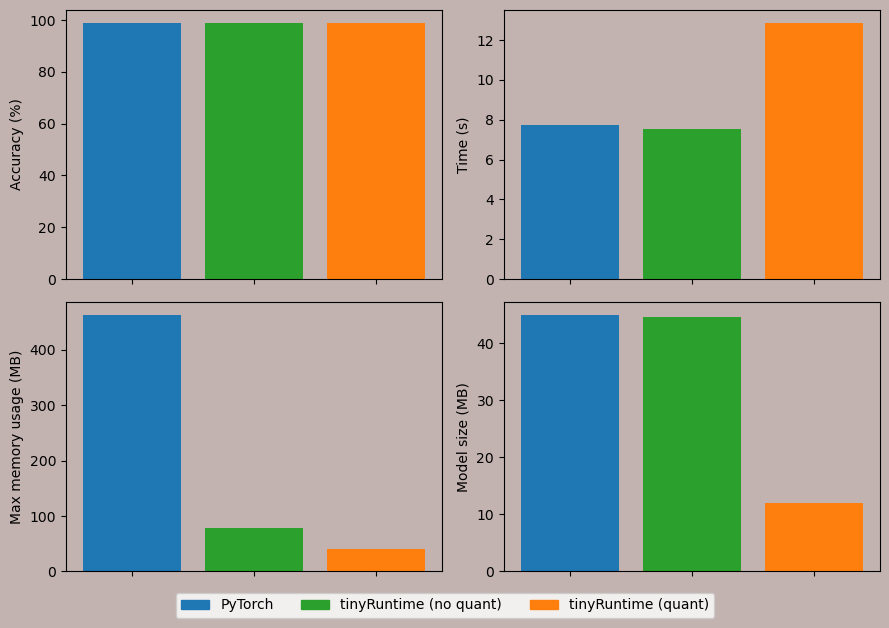

In [30]:
#| label: fig-arm
#| fig-cap: "Performance comparison on ARM"

df_arm = df[df["Platform"] == "arm64"]
plot_perf_comp(df_arm)

# Runtime Optimization Progress

NameError: name 'patches' is not defined

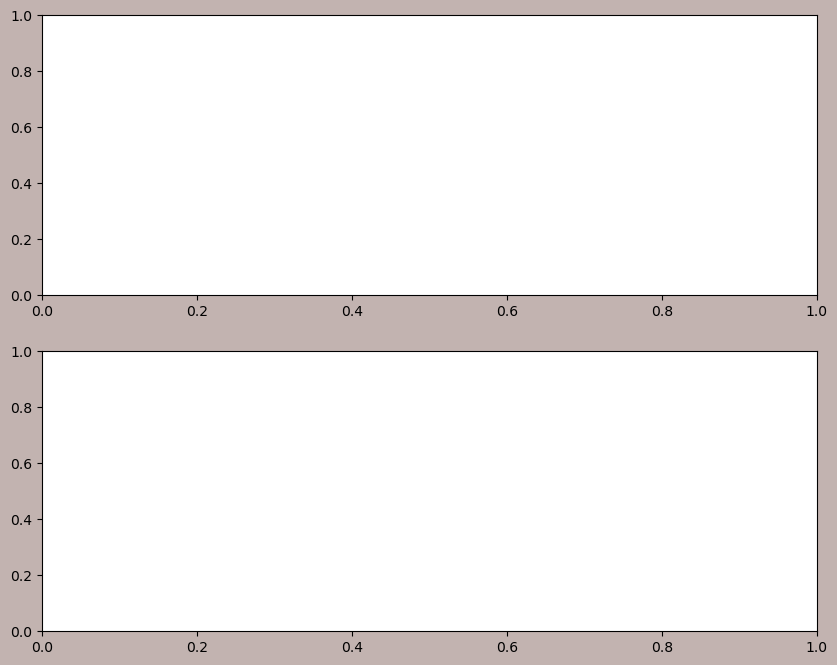

In [33]:
#| label: fig-time
#| fig-cap: "Runtime performance improvement over time"

def plot_progress(ax, df):
    '''Plot evolution of execution time'''
    df_pytorch, df_trv, df_trq = split_dataframe(df)
    ax.plot(df_pytorch["Date"], df_pytorch["Time"], "tab:blue", label='PyTorch')
    ax.plot(df_trv["Date"], df_trv["Time"], "tab:green", label='tinyRuntime (no quant)')
    ax.plot(df_trq["Date"], df_trq["Time"], "tab:orange", label='tinyRuntime (quant)')
    ax.set_ylabel("Time (s)")
    ax.set_xlabel("Date")
    ax.set_facecolor("#C2B3B0")

fig, axs = plt.subplots(2, 1, figsize=(10, 8))
fig.patch.set_facecolor('#C2B3B0') # set background color
fig.legend(handles=patches, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3)

# Plot for x86
plot_progress(axs[0], df_x86)
axs[0].set_title('x86')

# Plot for ARM
plot_progress(axs[1], df_arm)
axs[1].set_title('ARM')

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show()